In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another
A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to view and fit

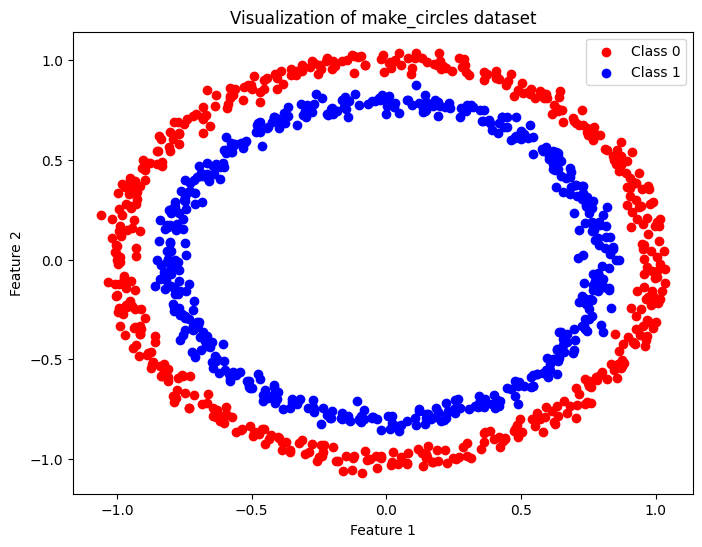

In [29]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of make_circles dataset')
plt.legend()
plt.show()

In [30]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [31]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

# Our data is a little hard to understand right now.. let's visualize it!

In [32]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


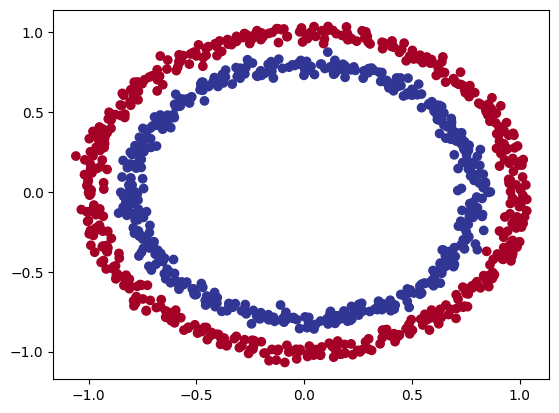

In [33]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [34]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [35]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [36]:
# Check tf version
tf.__version__

'2.12.0-rc1'

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.1715 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9342 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 569us/step - loss: 1.4981 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 671us/step - loss: 0.7280 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4940


In [38]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)

In [39]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 991us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getiing around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [42]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization functions such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 10 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [44]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.5110


[0.6988096237182617, 0.5109999775886536]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [46]:
def plot_decision_boundary(model, X, y):
    """
    Plots the dicision boundary created by a model predicting on X.
    This function was inspired by two resources: 
    1. cs231n
    2. madewithml
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 788us/step
doing binary classification


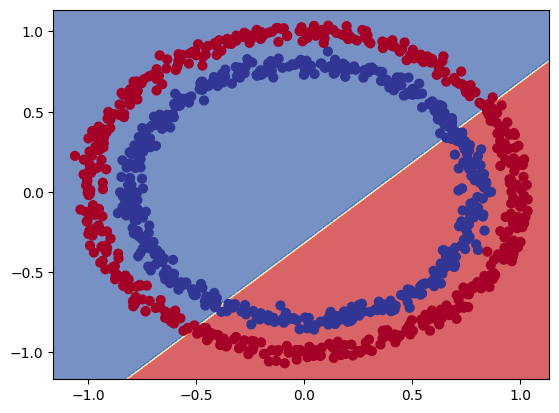

In [47]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [63]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regresion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train = tf.expand_dims(X_reg_train, axis=-1)

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
#             y_reg_train,
#             epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [65]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 431.4107 - mae: 431.4107
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 325.2878 - mae: 325.2878
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 223.1080 - mae: 223.1080
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 116.9137 - mae: 116.9137
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 48.9798 - mae: 48.9798
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 80.8778 - mae: 80.8778
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 70.4465 - mae: 70.4465
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 44.7444 - mae: 44.7444
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 50.1931 - mae: 50.1931
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.0853 - mae: 43.0853
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 2ms/step - loss: 39.1227 - mae: 39.1227
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1034 - mae: 39.1034
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 39.0982 - mae: 39.0982
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9787 - mae: 38.9787
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 38.7930 - mae: 38.7930
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1259 - mae: 39.1259
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 39.4179 - mae: 39.4179
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6441 - mae: 38.6441
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 39.0381 - mae: 39.0381
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8992 - mae: 38.8992
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 2ms/step


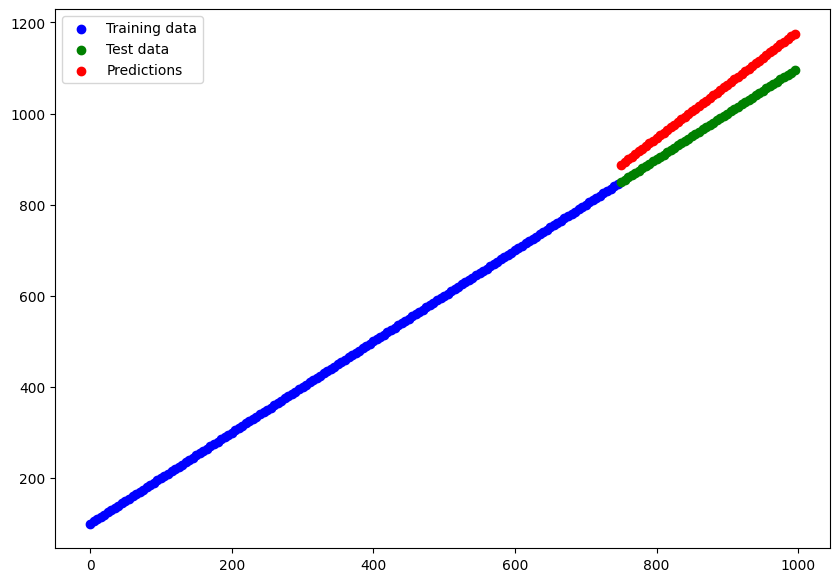

In [70]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c='r', label="Predictions")
plt.legend()